In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\lasra\Desktop\olympics\Olympic paris\medals.csv")

In [3]:
# Group by country and calculate the total number of medals and total number of gold medals for each country
total_medals_per_country = data.groupby('country_code').size().reset_index(name='total_medal_count')
gold_medals_per_country = data[data['medal_type'] == 'Gold Medal'].groupby('country_code').size().reset_index(name='gold_medal_count')

# Merge the two dataframes on the 'country_code' column
combined_medals_country = pd.merge(total_medals_per_country, gold_medals_per_country, on='country_code', how='left')

# Fill any NaN values in the gold_medal_count column with 0 (in case some countries have no gold medals)
combined_medals_country['gold_medal_count'] = combined_medals_country['gold_medal_count'].fillna(0)

# Sort by the total number of medals in descending order and select the top 5 countries
top_countries_by_gold = combined_medals_country.sort_values(by='gold_medal_count', ascending=False).head(5).reset_index(drop=True)

top_countries_by_gold

,country_code,total_medal_count,gold_medal_count
0,USA,126,40.0
1,CHN,90,39.0
2,JPN,45,20.0
3,AUS,53,18.0
4,FRA,64,16.0


In [4]:
# Create a dataframe with just the country codes from the top 5 countries by gold medals
top_5_countries_by_gold_codes = top_countries_by_gold[['country_code']]

top_5_countries_by_gold_codes


,country_code
0,USA
1,CHN
2,JPN
3,AUS
4,FRA


In [5]:
# Filter the dataset to include only the top 5 countries by gold medals
top_5_countries_data = data[data['country_code'].isin(top_5_countries_by_gold_codes['country_code'])]

# Group by discipline and country and calculate the number of medals won by each country in each discipline
medals_per_discipline_country = top_5_countries_data.groupby(['discipline', 'country_code']).size().reset_index(name='country_medal_count')

# Group by discipline and calculate the total number of medals for each discipline
total_medals_per_discipline = data.groupby('discipline').size().reset_index(name='total_medal_count')

# Merge the total medals with the country-specific medals
combined_discipline_country_medals = pd.merge(medals_per_discipline_country, total_medals_per_discipline, on='discipline', how='left')

# Calculate the share of medals for each country in each discipline
combined_discipline_country_medals['medal_share'] = (combined_discipline_country_medals['country_medal_count'] / combined_discipline_country_medals['total_medal_count']) * 100

# Sort by discipline and country code
combined_discipline_country_medals = combined_discipline_country_medals.sort_values(by=['discipline', 'country_code']).reset_index(drop=True)

combined_discipline_country_medals

,discipline,country_code,country_medal_count,total_medal_count,medal_share
0,3x3 Basketball,FRA,1,6,16.666667
1,3x3 Basketball,USA,1,6,16.666667
2,Archery,CHN,1,15,6.666667
3,Archery,FRA,2,15,13.333333
4,Archery,USA,2,15,13.333333
...,...,...,...,...,...
114,Weightlifting,CHN,5,30,16.666667
115,Weightlifting,USA,2,30,6.666667
116,Wrestling,CHN,5,72,6.944444
117,Wrestling,JPN,11,72,15.277778


In [6]:
# Filter the dataset to include only the top 5 countries by gold medals and only gold medals
gold_medals_data = data[(data['medal_type'] == 'Gold Medal') & (data['country_code'].isin(top_5_countries_by_gold_codes['country_code']))]

# Group by discipline and country and calculate the number of gold medals won by each country in each discipline
gold_medals_per_discipline_country = gold_medals_data.groupby(['discipline', 'country_code']).size().reset_index(name='country_gold_medal_count')

# Group by discipline and calculate the total number of gold medals for each discipline
total_gold_medals_per_discipline = data[data['medal_type'] == 'Gold Medal'].groupby('discipline').size().reset_index(name='total_gold_medal_count')

# Merge the total gold medals with the country-specific gold medals
combined_discipline_country_gold_medals = pd.merge(gold_medals_per_discipline_country, total_gold_medals_per_discipline, on='discipline', how='left')

# Calculate the share of gold medals for each country in each discipline
combined_discipline_country_gold_medals['gold_medal_share'] = (combined_discipline_country_gold_medals['country_gold_medal_count'] / combined_discipline_country_gold_medals['total_gold_medal_count']) * 100

# Sort by discipline and country code
combined_discipline_country_gold_medals = combined_discipline_country_gold_medals.sort_values(by=['discipline', 'country_code']).reset_index(drop=True)

combined_discipline_country_gold_medals

,discipline,country_code,country_gold_medal_count,total_gold_medal_count,gold_medal_share
0,Artistic Gymnastics,CHN,2,14,14.285714
1,Artistic Gymnastics,JPN,3,14,21.428571
2,Artistic Gymnastics,USA,3,14,21.428571
3,Artistic Swimming,CHN,2,2,100.000000
4,Athletics,AUS,1,47,2.127660
5,Athletics,CHN,1,47,2.127660
6,Athletics,JPN,1,47,2.127660
7,Athletics,USA,14,47,29.787234
8,Badminton,CHN,2,5,40.000000
9,Basketball,USA,2,2,100.000000


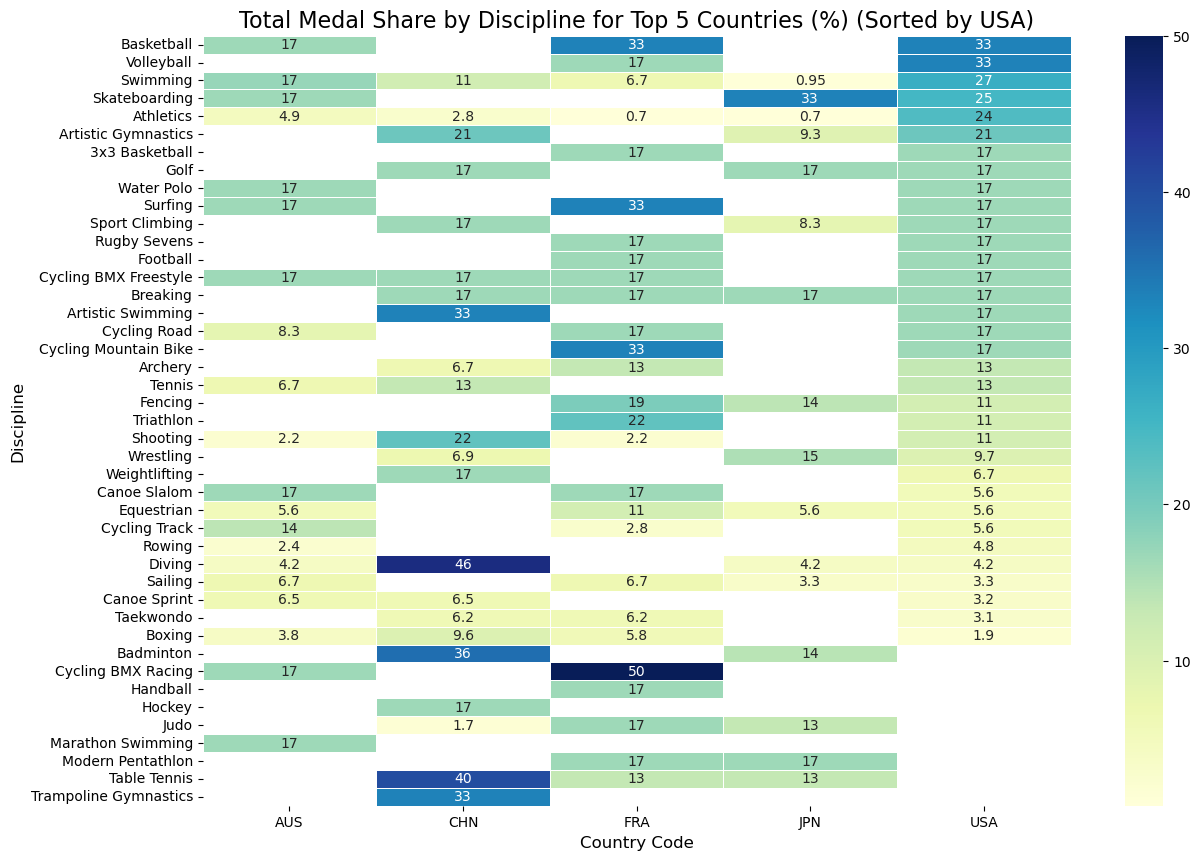

In [7]:
# Pivot the dataframe for total medals to create a matrix for the heatmap
heatmap_data_total_medals = combined_discipline_country_medals.pivot_table(
    index="discipline", 
    columns="country_code", 
    values="medal_share", 
    aggfunc='sum'
)

# Sort the disciplines by the total medal share for the USA in descending order
sorted_disciplines_total = heatmap_data_total_medals['USA'].sort_values(ascending=False).index

# Reorder the heatmap data based on the sorted disciplines
heatmap_data_sorted_total = heatmap_data_total_medals.loc[sorted_disciplines_total]

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_sorted_total, annot=True, cmap="YlGnBu", linewidths=.5)

# Add title and labels
plt.title("Total Medal Share by Discipline for Top 5 Countries (%) (Sorted by USA)", fontsize=16)
plt.xlabel("Country Code", fontsize=12)
plt.ylabel("Discipline", fontsize=12)

# Display the heatmap
plt.show()

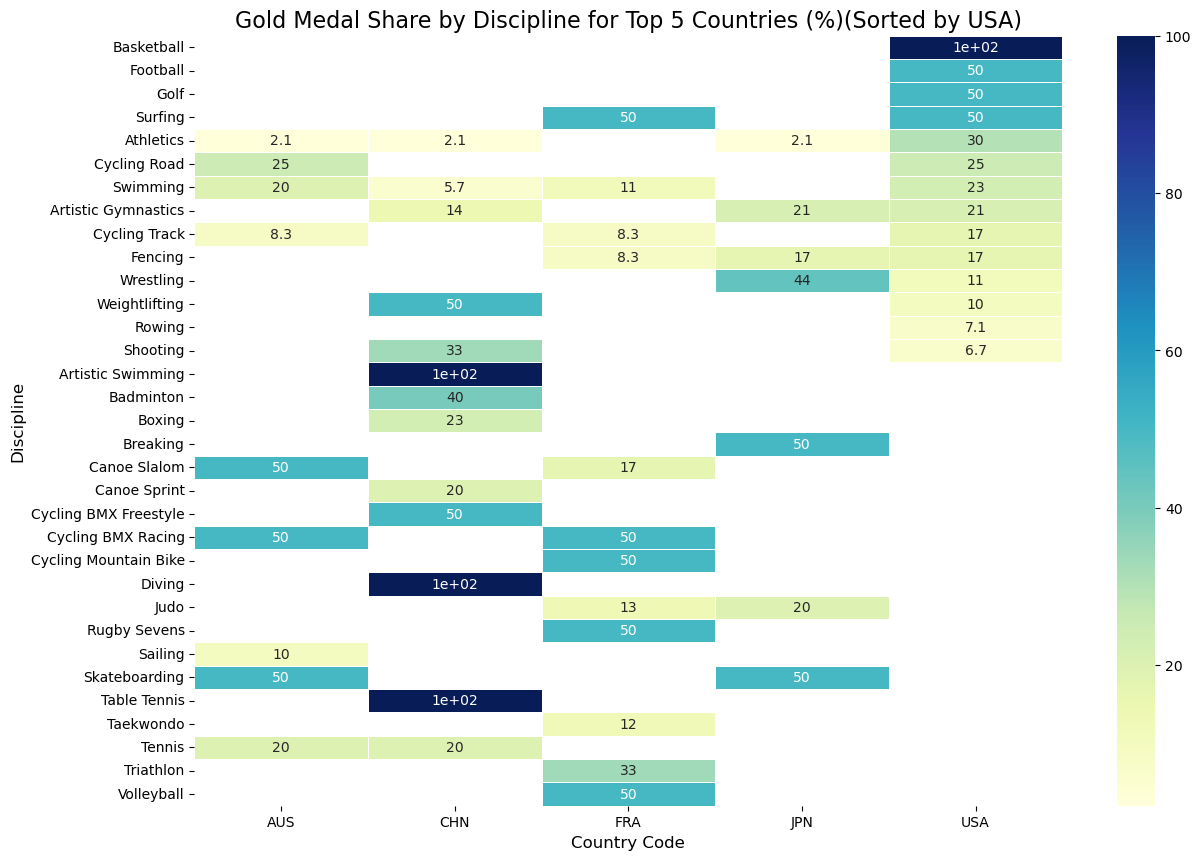

In [8]:
# Correct pivot using the pivot_table method
heatmap_data_corrected = combined_discipline_country_gold_medals.pivot_table(
    index="discipline", 
    columns="country_code", 
    values="gold_medal_share", 
    aggfunc='sum'
)

# Sort the disciplines by the gold medal share for the USA in descending order
sorted_disciplines = heatmap_data_corrected['USA'].sort_values(ascending=False).index

# Reorder the heatmap data based on the sorted disciplines
heatmap_data_sorted = heatmap_data_corrected.loc[sorted_disciplines]

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_sorted, annot=True, cmap="YlGnBu", linewidths=.5)

# Add title and labels
plt.title("Gold Medal Share by Discipline for Top 5 Countries (%)(Sorted by USA)", fontsize=16)
plt.xlabel("Country Code", fontsize=12)
plt.ylabel("Discipline", fontsize=12)

# Display the heatmap
plt.show()


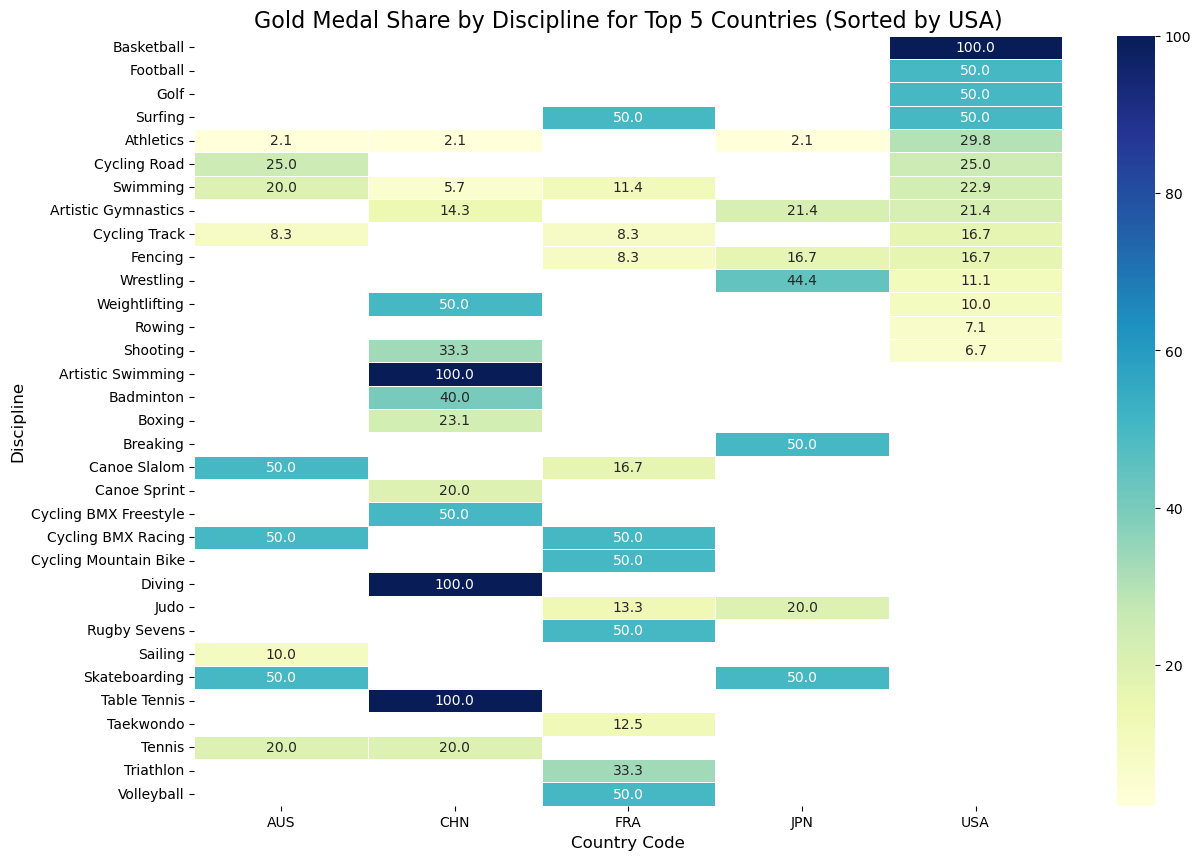

In [9]:
# Create the heatmap again for the gold medal share but format the annotation to show normal numbers
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_sorted, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

# Add title and labels
plt.title("Gold Medal Share by Discipline for Top 5 Countries (Sorted by USA)", fontsize=16)
plt.xlabel("Country Code", fontsize=12)
plt.ylabel("Discipline", fontsize=12)

# Display the heatmap
plt.show()

In [10]:
# Calculate the total number of unique disciplines
total_disciplines = data['discipline'].nunique()

total_disciplines

44

In [11]:
# Filter the dataset to include only the top 5 countries by gold medals
top_5_countries_data = data[data['country_code'].isin(top_5_countries_by_gold_codes['country_code'])]

# Calculate the total number of unique disciplines in which each of the top 5 countries has won a medal
disciplines_per_country = top_5_countries_data.groupby('country_code')['discipline'].nunique().reset_index(name='total_disciplines')

disciplines_per_country

,country_code,total_disciplines
0,AUS,20
1,CHN,22
2,FRA,27
3,JPN,16
4,USA,34


In [12]:
# Filter the dataset to include only gold medals won by the top 5 countries by gold medals
top_5_gold_medals_data = data[(data['medal_type'] == 'Gold Medal') & (data['country_code'].isin(top_5_countries_by_gold_codes['country_code']))]

# Calculate the total number of unique disciplines in which each of the top 5 countries has won a gold medal
gold_disciplines_per_country = top_5_gold_medals_data.groupby('country_code')['discipline'].nunique().reset_index(name='total_gold_disciplines')

gold_disciplines_per_country 

,country_code,total_gold_disciplines
0,AUS,9
1,CHN,13
2,FRA,12
3,JPN,7
4,USA,14


In [13]:
# Merge the two dataframes on the 'country_code' column
combined_disciplines_medals_gold = pd.merge(disciplines_per_country, gold_disciplines_per_country, on='country_code', how='left')

combined_disciplines_medals_gold

,country_code,total_disciplines,total_gold_disciplines
0,AUS,20,9
1,CHN,22,13
2,FRA,27,12
3,JPN,16,7
4,USA,34,14


In [14]:
combined_disciplines_medals_gold[ "Medal Share Ratio by Country (Across Participated Disciplines)"] = round(combined_disciplines_medals_gold['total_disciplines']/total_disciplines,2)

In [15]:
combined_disciplines_medals_gold["Gold Medal Share Ratio by Country (Across Participated Disciplines)"] = round(combined_disciplines_medals_gold['total_gold_disciplines']/total_disciplines,2)

In [16]:
combined_disciplines_medals_gold.sort_values('total_gold_disciplines', ascending=False)

,country_code,total_disciplines,total_gold_disciplines,Medal Share Ratio by Country (Across Participated Disciplines),Gold Medal Share Ratio by Country (Across Participated Disciplines)
4,USA,34,14,0.77,0.32
1,CHN,22,13,0.50,0.30
2,FRA,27,12,0.61,0.27
0,AUS,20,9,0.45,0.20
3,JPN,16,7,0.36,0.16


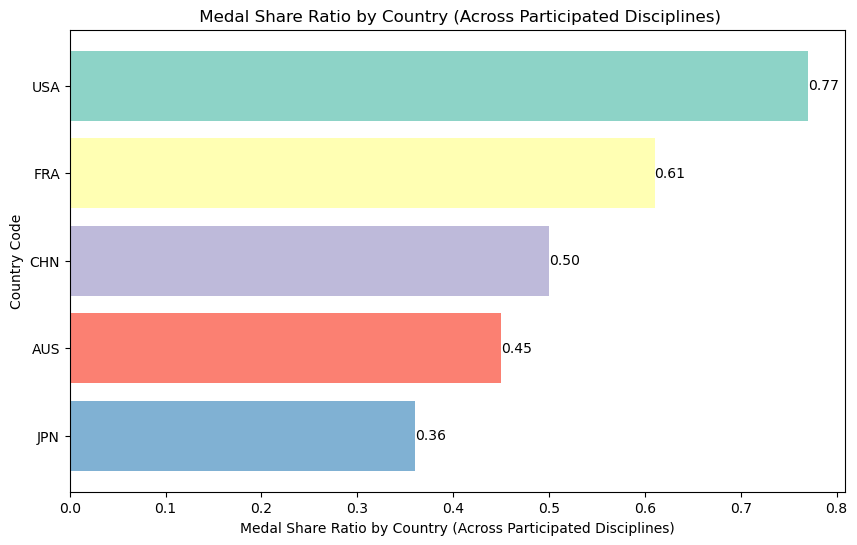

In [21]:
# Define a color palette for the countries
colors = plt.cm.Set3(range(len(combined_disciplines_medals_gold)))

# Create a horizontal bar chart for total_disciplines_ratio with unique colors for each country
plt.figure(figsize=(10, 6))
combined_disciplines_medals_gold_sorted_ratio = combined_disciplines_medals_gold.sort_values(by= "Medal Share Ratio by Country (Across Participated Disciplines)", ascending=False)
plt.barh(combined_disciplines_medals_gold_sorted_ratio['country_code'], 
         combined_disciplines_medals_gold_sorted_ratio[ "Medal Share Ratio by Country (Across Participated Disciplines)"], 
         color=colors)

# Add values on each bar
for index, value in enumerate(combined_disciplines_medals_gold_sorted_ratio[ "Medal Share Ratio by Country (Across Participated Disciplines)"]):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.xlabel( "Medal Share Ratio by Country (Across Participated Disciplines)")
plt.ylabel('Country Code')
plt.title(' Medal Share Ratio by Country (Across Participated Disciplines)')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

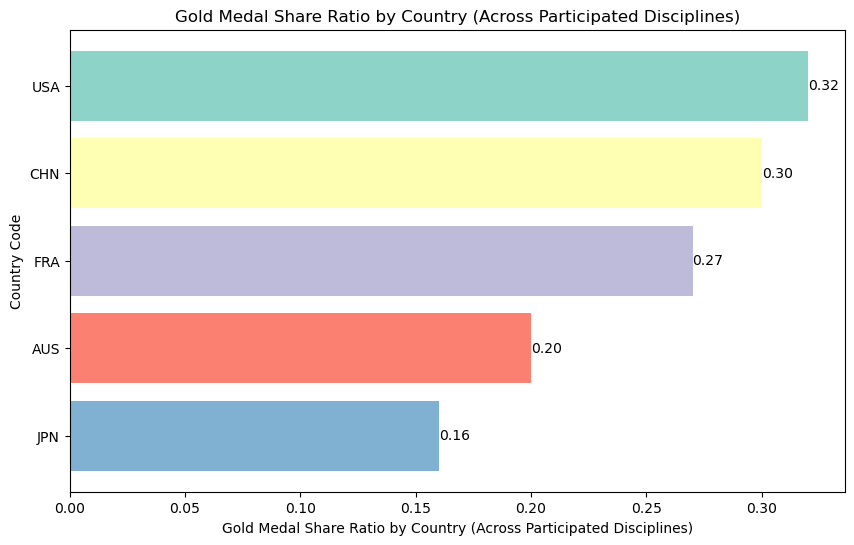

In [22]:
# Create a horizontal bar chart for total_disciplines_gold_ratio with the same unique colors for each country
plt.figure(figsize=(10, 6))
combined_disciplines_medals_gold_sorted_gold_ratio = combined_disciplines_medals_gold.sort_values(by="Gold Medal Share Ratio by Country (Across Participated Disciplines)", ascending=False)
plt.barh(combined_disciplines_medals_gold_sorted_gold_ratio['country_code'], 
         combined_disciplines_medals_gold_sorted_gold_ratio["Gold Medal Share Ratio by Country (Across Participated Disciplines)"], 
         color=colors)

# Add values on each bar
for index, value in enumerate(combined_disciplines_medals_gold_sorted_gold_ratio["Gold Medal Share Ratio by Country (Across Participated Disciplines)"]):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.xlabel("Gold Medal Share Ratio by Country (Across Participated Disciplines)")
plt.ylabel('Country Code')
plt.title('Gold Medal Share Ratio by Country (Across Participated Disciplines)')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()
